## Desciption

This model predicts if a promoter's gene is 'active' in LB, based on the Urtecho 2023 data.

In [1]:
import CNN_Urtecho_LB_M9_active_1_0 as parent

In [2]:
name = 'CNN_Urtecho_LB_active_1_0'

In [3]:
import pandas as pd

# Load data
file_path = '../Data/Urtecho_2023/Urtecho_2023_LB_M9.csv'
df = pd.read_csv(file_path)[['promoter_sequence', 'LB_active']]

# Preprocess data
X = df['promoter_sequence']
y = df['LB_active']
X, _ = parent.preprocess_sequences(X)

In [4]:
X.shape

(4455, 2251, 4)

In [5]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 47s 160ms/step - accuracy: 0.7586 - loss: 0.4908 - val_accuracy: 0.7868 - val_loss: 0.4685
Epoch 2/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - accuracy: 0.7798 - loss: 0.4529 - val_accuracy: 0.7868 - val_loss: 0.4584
Epoch 3/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.8018 - loss: 0.3983 - val_accuracy: 0.7811 - val_loss: 0.5021
Epoch 4/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.8430 - loss: 0.3320 - val_accuracy: 0.7688 - val_loss: 0.5167
Epoch 5/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - accuracy: 0.9155 - loss: 0.2233 - val_accuracy: 0.6869 - val_loss: 0.6801
Epoch 6/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.9539 - loss: 0.1420 - val_accuracy: 0.7295 - val_loss: 0.7642
Epoch 7/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.9769 - loss: 0.0775 - val_accuracy: 0.7508 - val_loss: 1.1068
Epoch 8/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9936 - 

28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step


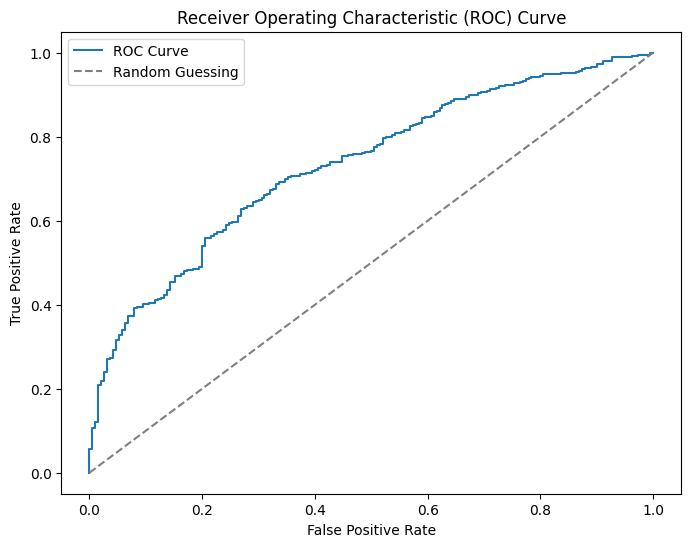

In [ ]:
y_pred = parent.load_and_predict(name, X_test)
parent.plot_roc_curve(y_test, parent.ravel(y_pred))

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


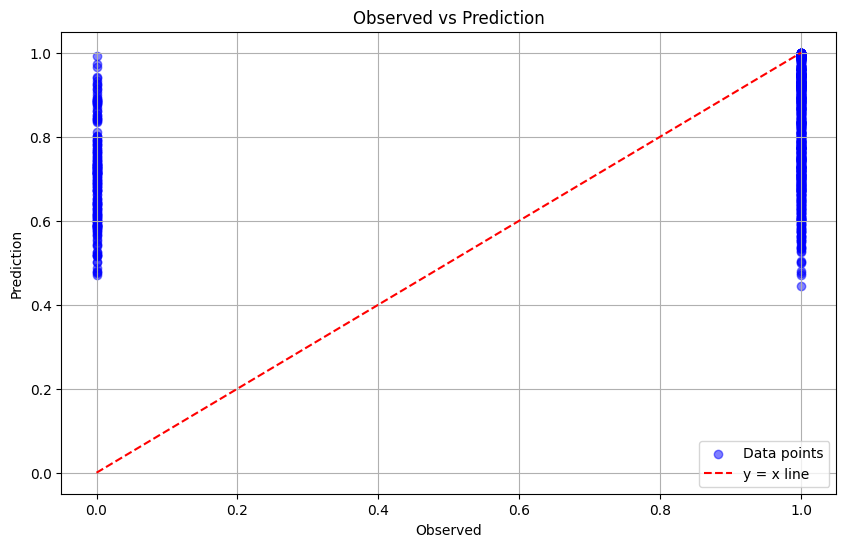

In [ ]:
parent.plot_scatter(y_test, parent.ravel(y_pred))

In [10]:
loss

{'accuracy': 0.7867564534231201,
 'precision': 0.7900113507377979,
 'recall': 0.992867332382311,
 'f1_score': 0.8798988621997471,
 'auc': 0.7331030858172536}